## Deployment de algoritmos ML

In [13]:
#LIBRERIAS
import joblib
import pandas as pd
import numpy as np
#Para mostrar el grafo
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

### Cargo los datos para la validacion de los modelos

In [2]:
X_test = pd.read_csv('X_test.csv')
Y_test = pd.read_csv('Y_test.csv')
print(X_test.head())
print(Y_test.head())

    Age  SibSp  Parch      Fare  Embarked  passenger_class  passenger_sex
0  28.0      0      0    7.8542         2                0              1
1  14.0      1      2  120.0000         2                2              0
2  14.0      1      0   11.2417         0                0              0
3  30.0      0      0   13.0000         2                1              1
4  18.0      0      2   79.6500         2                2              0
   passenger_survived
0                   0
1                   1
2                   1
3                   0
4                   1


### Cargamos modelo SVM

In [88]:
file_svm= 'smv_kernel=poly_C=10000.sav'
svm_model = joblib.load(file_svm)
result = svm_model.score(X_test, Y_test)
print(result)
print(svm_model)


0.8202247191011236
SVC(C=10000, kernel='poly')


### Cargamos modelo Decisicion TREE

In [87]:
file_tree = 'tree_depth=3_critery=entropy.sav'
tree_model = joblib.load(file_tree)
result_tree = tree_model.score(X_test, Y_test)
print(result_tree)
print(tree_model)

0.8202247191011236
DecisionTreeClassifier(criterion='entropy', max_depth=3)


### Cargamos modelo Naiv

In [92]:
file_naive = 'naive_sk.sav'
naive_model = joblib.load(file_naive)
result_naive = naive_model.score(X_test, Y_test)
print(result_naive)
print(naive_model)

0.7752808988764045
GaussianNB()


### Cargamos modelo Regresion Logistica con Sigmod

In [121]:
file_log= 'reg_log.sav'
reg_model = joblib.load(file_log)
print(reg_model)

[[ 1.9099374e+00 -4.5629371e-02 -4.3580651e-01 -2.0582281e-01
   1.9161250e-03 -4.9982369e-02  1.1214141e+00 -2.7564263e+00]]


In [128]:
import tensorflow as tf
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [165]:
def predict_logistic_reg(X_test, weights):
    
    X_test = np.insert(np.array(X_test),0, np.ones(len(X_test)), axis = 1)
    
    tf.reset_default_graph()
    
    tensor_w = tf.placeholder(tf.float32, shape = [None, None], name = "tensor_w")
    tensor_x = tf.placeholder(tf.float32, shape = [None, None], name = "tensor_x")
    
    logits = tf.matmul(tensor_x, tf.transpose(tensor_w))
    sigmoid = tf.nn.sigmoid(logits)
    prediction = tf.round(sigmoid)
    
    with tf.train.MonitoredSession() as session:
        feed_dictionary = {tensor_x: X_test, tensor_w:weights}
        
        predictions = session.run(prediction, feed_dict= feed_dictionary)
        
        return int(np.sum(predictions))

In [166]:
#X_test_log = np.insert(np.array(X_test),0, np.ones(len(X_test)), axis = 1)
#print(X_test_log.shape)
#x_r = np.insert(np.array(X_test),0, np.ones(len(X_test)), axis = 1)
x_r =X_test.iloc[[1]]
res = predict_logistic_reg(x_r,reg_model)
#res=int(np.sum(res))
res
#predict_logistic_reg(x_r,reg_model)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


1

## Funcion para predecir Observaciones

In [167]:
def predict_with_emsamble(observation):
    one_sum = 0
    zero_sum = 0
    
    #calcular con tree
    tree_predictions_val = tree_model.predict(observation)
    #print(tree_predictions_val)
    if tree_predictions_val[0]== 1:
        one_sum+=1
    else:zero_sum+=1 
    
    
    #calcular con smv
    svm_predictions_val = svm_model.predict(observation)
    #print(svm_predictions_val)
    if svm_predictions_val[0]== 1:
        one_sum+=1
    else:zero_sum+=1 
    
    #calcular con naive
    naive_predictions_val = naive_model.predict(observation)
    #print(svm_predictions_val)
    if naive_predictions_val[0]== 1:
        one_sum+=1
    else:zero_sum+=1 
    
    #calcular con regresion logistica
    if predict_logistic_reg(observation,reg_model) == 1:
        one_sum+=1
    else:zero_sum+=1 
    #decision en conjunto
    
    
    if  one_sum > zero_sum:
        return 1
    else:
        return 0
    

**Espacio para realizar pruebas de observaciones**

In [168]:
x_1 = X_test.iloc[[1]]
#print(Y_test.iloc[[1]])
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[1]].values)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
PRED: 1 Valor real: [[1]]


In [119]:
x_1 = X_test.iloc[[10]]
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[10]].values)

PRED: 0 Valor real: [[0]]


In [120]:
x_1 = X_test.iloc[[20]]
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[20]].values)

PRED: 0 Valor real: [[0]]


In [110]:
x_1 = X_test.iloc[[30]]
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[30]].values)

PRED: 0 Valor real: [[1]]


In [111]:
x_1 = X_test.iloc[[40]]
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[40]].values)

PRED: 0 Valor real: [[0]]


In [112]:
x_1 = X_test.iloc[[50]]
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[50]].values)

PRED: 1 Valor real: [[1]]


In [113]:
x_1 = X_test.iloc[[60]]
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[60]].values)

PRED: 0 Valor real: [[1]]


In [114]:
x_1 = X_test.iloc[[80]]
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[80]].values)

PRED: 1 Valor real: [[0]]


In [115]:
x_1 = X_test.iloc[[90]]
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[90]].values)

PRED: 0 Valor real: [[1]]


In [116]:
x_1 = X_test.iloc[[100]]
print("PRED:",predict_with_emsamble(x_1),"Valor real:",Y_test.iloc[[100]].values)

PRED: 0 Valor real: [[0]]


**Arbol Generado por Scikit Learn**

In [14]:
def visualize_decision_tree(clf, x_vars,file_name):
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_vars,class_names=['0','1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(file_name)
    Image(graph.create_png())

In [17]:
x_vars = list(X_test.columns)

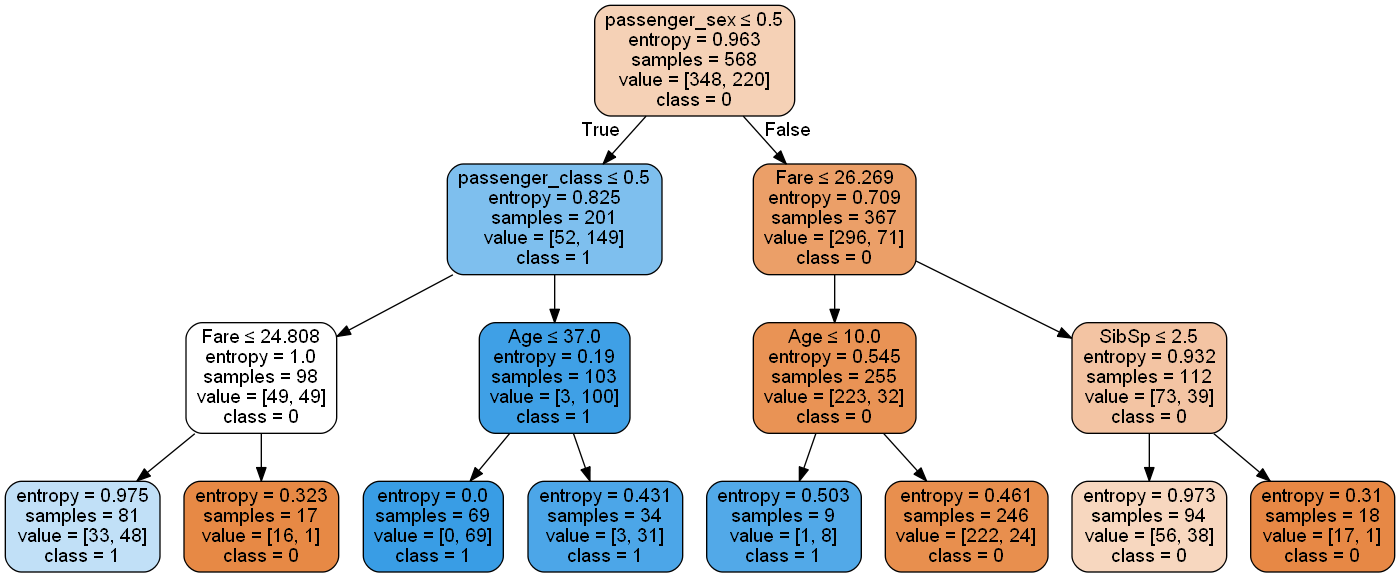

In [18]:
visualize_decision_tree(tree_model,x_vars,'arbol.png')
Image('arbol.png')